<a href="https://colab.research.google.com/github/HowardHNguyen/PhD/blob/main/Heart_Failure_Prediction_GenAI_303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data description: dataset consists of 303 observations
The dataset is the Cleveland Heart Disease dataset taken from the UCI repository. The dataset consists of 303 individuals’ data. There are 14 columns in the dataset(which have been extracted from a larger set of 75). No missing values. The classification task is to predict whether an individual is suffering from heart disease or not. (0: absence, 1: presence)

original data: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/heart_disease_uci_303.csv', sep=',')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


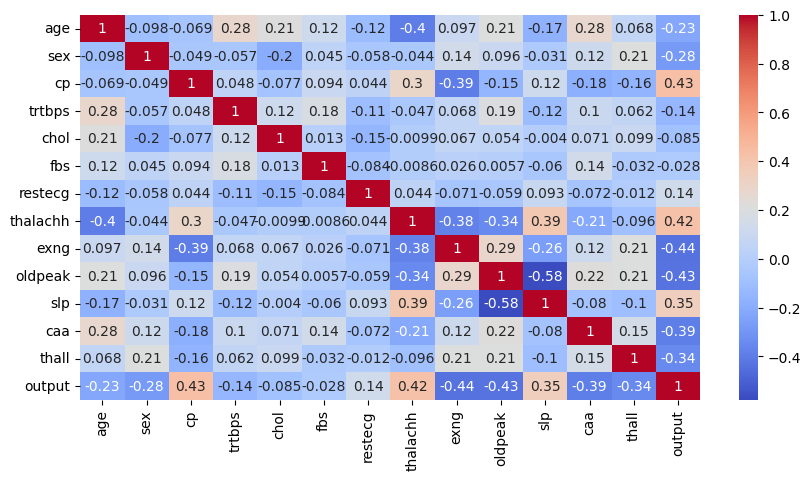

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
RANDID,0
SEX,0
TOTCHOL,0
AGE,0
SYSBP,0
DIABP,0
CURSMOKE,0
CIGPDAY,0
BMI,0
DIABETES,0


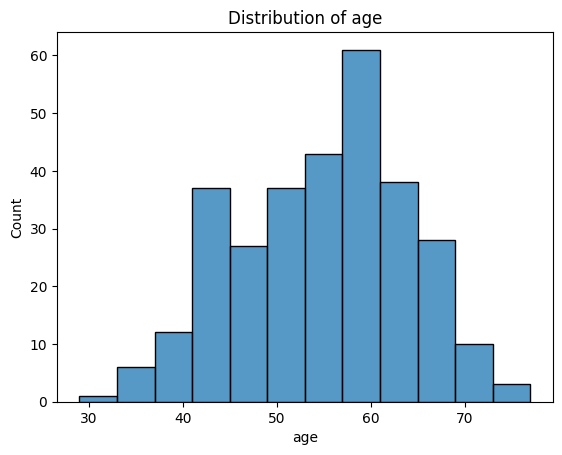

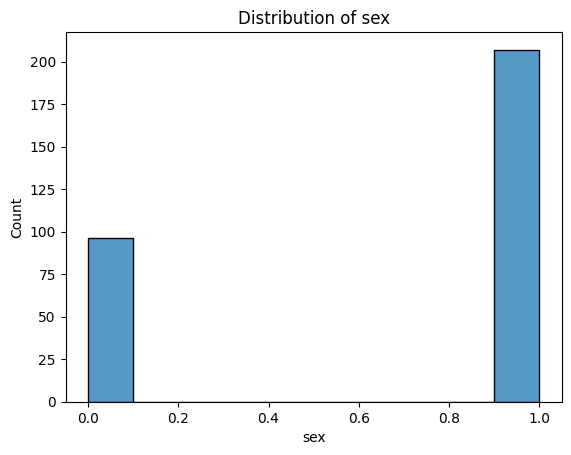

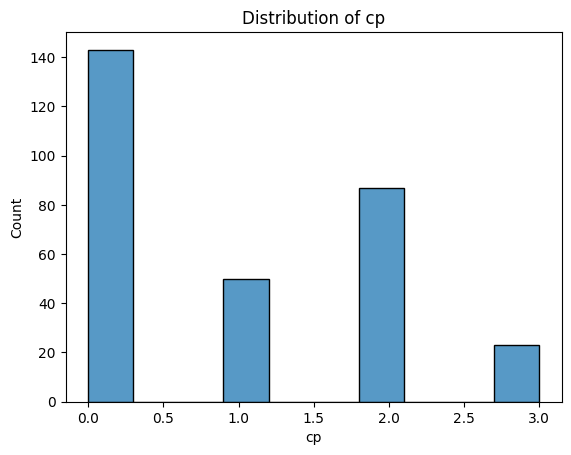

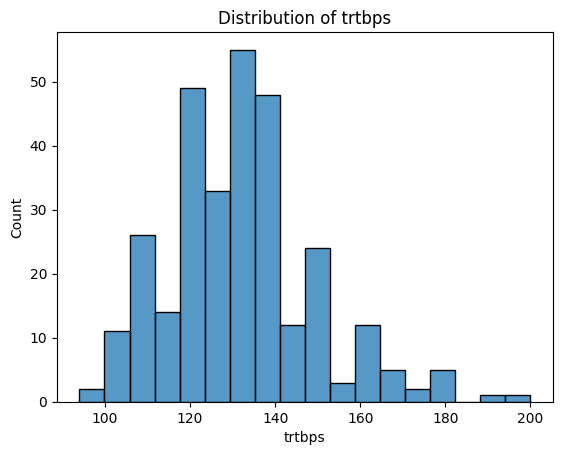

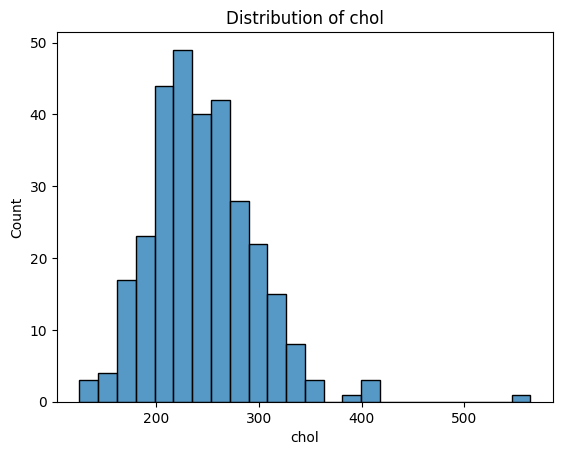

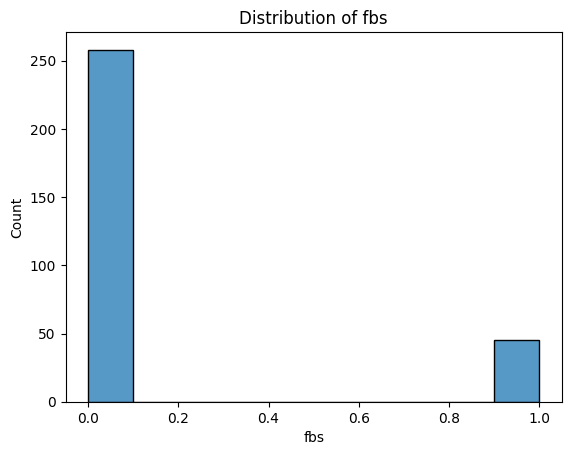

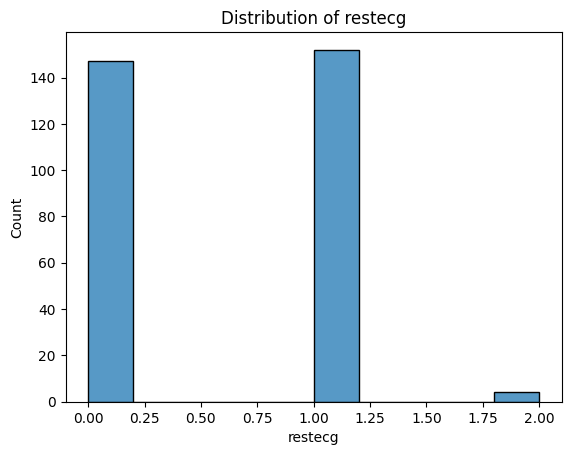

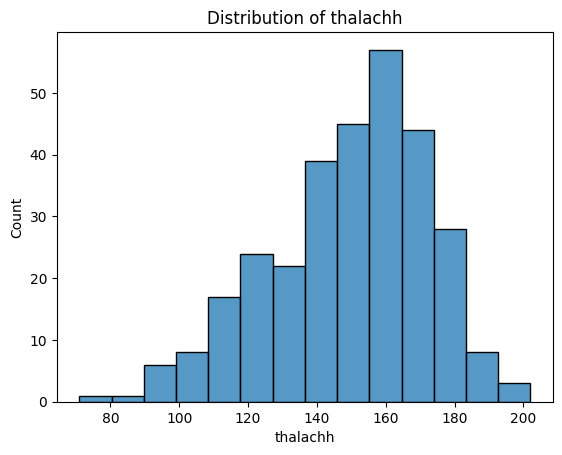

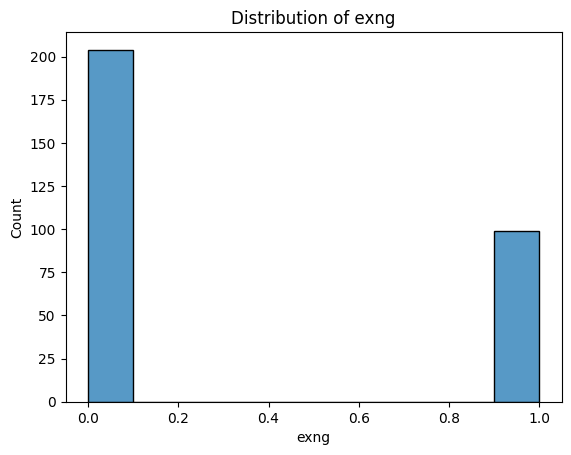

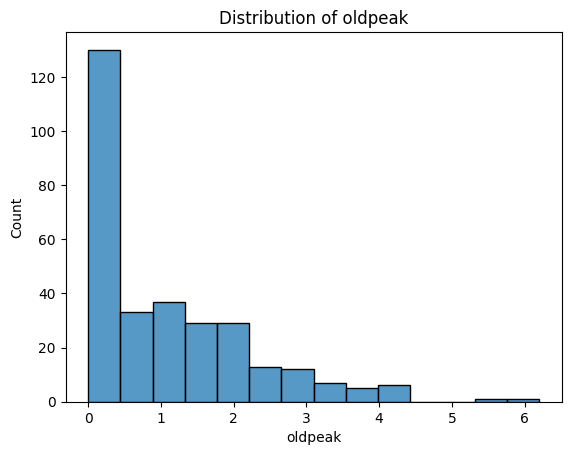

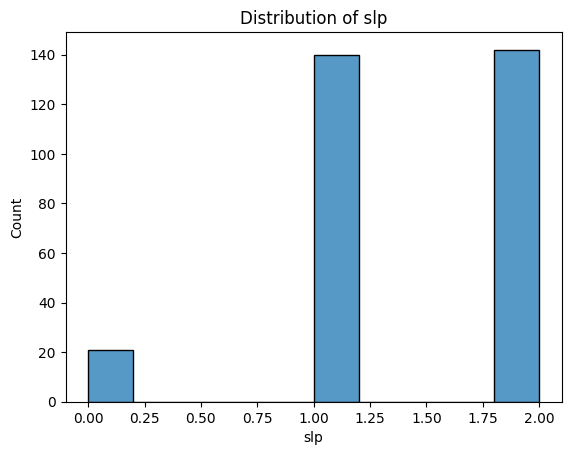

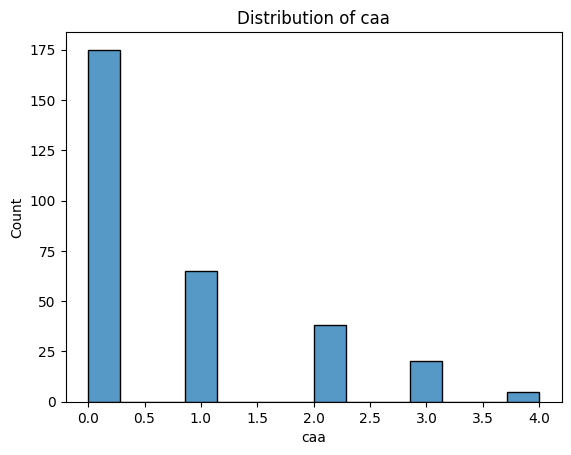

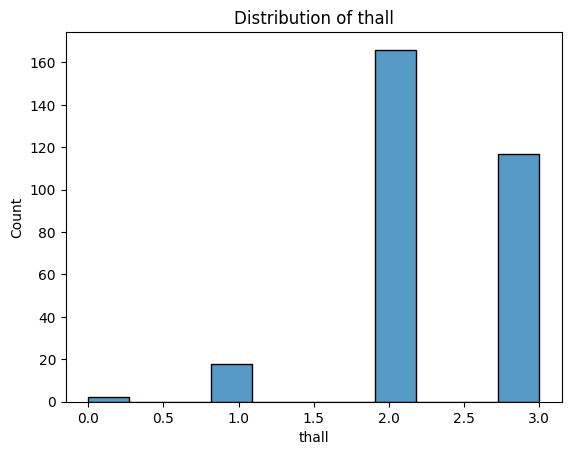

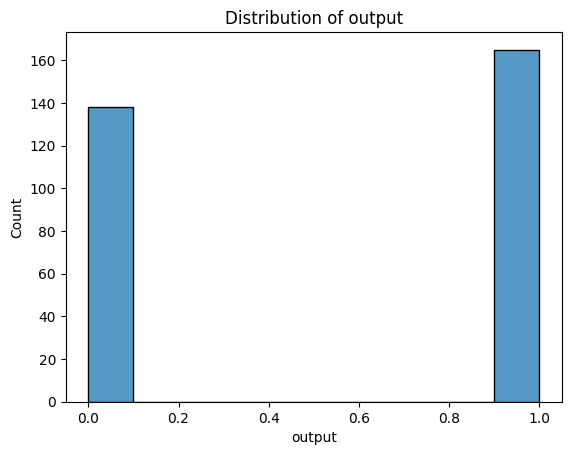

In [9]:
# prompt: histplot for this dataset

import matplotlib.pyplot as plt
# Histplot for each numerical feature
for column in data.select_dtypes(include=['number']):
  plt.figure()
  sns.histplot(data[column])
  plt.title(f'Distribution of {column}')
  plt.show()


### Based ML models

**SMOTE (Synthetic Minority Over-sampling Technique) and most machine learning models require numeric input. Therefore, you need to encode these categorical variables before applying SMOTE and training your models.**

1. Encoding Categorical Variables: Convert categorical variables into numeric values using LabelEncoder and pd.get_dummies.
2. Define Features and Target: Drop the target column HeartDisease from the features and assign it to y.
3. Apply SMOTE: Balance the dataset using SMOTE.
4. Split Data: Split the resampled data into training and testing sets.
5. Scale Features: Standardize the features using StandardScaler.
6. Train and Evaluate Models: Train each model and evaluate its performance using classification metrics and ROC AUC.

In [ ]:
#!pip install imblearn

In [ ]:
#!pip install xgboost

In [ ]:
# filling nan values with mean
data = data.fillna(data.mean())

In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
# Based models
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
# log_reg = LogisticRegression(max_iter=10000)
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression - dataset 303")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')

Logistic Regression - dataset 303
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.81      0.76      0.79        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66

ROC AUC: 0.85


### new models

In [12]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
#log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression - dataset 303")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')

Logistic Regression - dataset 303
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.81      0.76      0.79        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66

ROC AUC: 0.85


In [13]:
# Support Vector Machine
svm = SVC(probability=True)
#svm = SVC(C=1.0, kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("Support Vector Machine - dataset 303")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'ROC AUC: {roc_auc_svm:.2f}')

Support Vector Machine - dataset 303
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.83      0.88      0.86        34

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66

ROC AUC: 0.86


In [14]:
# Random Forest
# rf = RandomForestClassifier(random_state=42)
rf = RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest - dataset 303")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest - dataset 303
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.79      0.79      0.79        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66

ROC AUC: 0.86


In [15]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest - dataset 303")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest - dataset 303
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.81      0.88      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66

ROC AUC: 0.91


In [16]:
# Gradient Boosting Machine
gbm = GradientBoostingClassifier(random_state=42)
# gbm = GradientBoostingClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)
y_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Machine - dataset 303")
print(classification_report(y_test, y_pred_gbm))
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f'ROC AUC: {roc_auc_gbm:.2f}')

Gradient Boosting Machine - dataset 303
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.76      0.85      0.81        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66

ROC AUC: 0.87


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# XGBoost Classifier
xgbm = XGBClassifier(random_state=42)
# xgbm = XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42)
xgbm.fit(X_train, y_train)

# Predictions
y_pred_xgbm = xgbm.predict(X_test)
y_proba_xgbm = xgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost - dataset 303")
print(classification_report(y_test, y_pred_xgbm))
roc_auc_xgbm = roc_auc_score(y_test, y_proba_xgbm)
print(f'ROC AUC: {roc_auc_xgbm:.2f}')

XGBoost - dataset 303
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.78      0.85      0.82        34

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66

ROC AUC: 0.86


### RF + xGBM + SVM

Stacking Ensemble RF + XGBM + SVM - dataset 303
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.81      0.88      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66

ROC AUC - dataset 303: 0.87


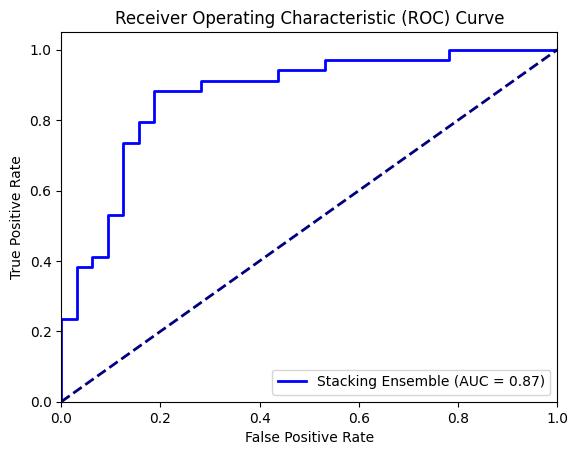

In [18]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgbm', XGBClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble RF + XGBM + SVM - dataset 303")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC - dataset 303: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### RF + GBM + xGBM

Stacking Ensemble of RF + GBM + xGBM - dataset 303
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.79      0.88      0.83        34

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66

ROC AUC - dataset 303: 0.90


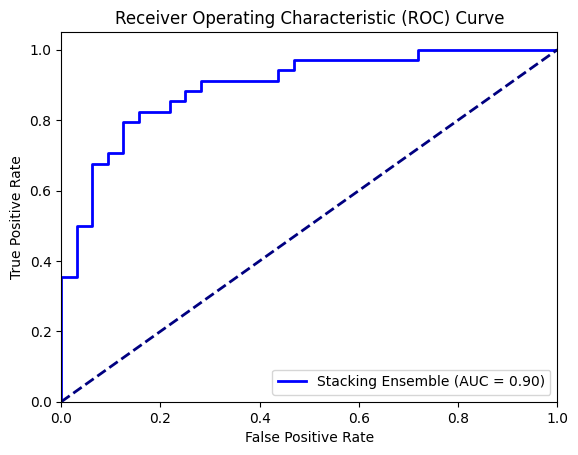

In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('xgbm', XGBClassifier(random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble of RF + GBM + xGBM - dataset 303")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC - dataset 303: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
data.shape

(303, 14)

### Feature Importance from RF

Random Forest Feature Importances - dataset 303
     Feature  Importance
7   thalachh    0.151355
2         cp    0.141737
11       caa    0.106572
9    oldpeak    0.102629
4       chol    0.083146
3     trtbps    0.078397
0        age    0.076769
10       slp    0.069085
12     thall    0.066034
8       exng    0.052298
1        sex    0.039001
6    restecg    0.022706
5        fbs    0.010272


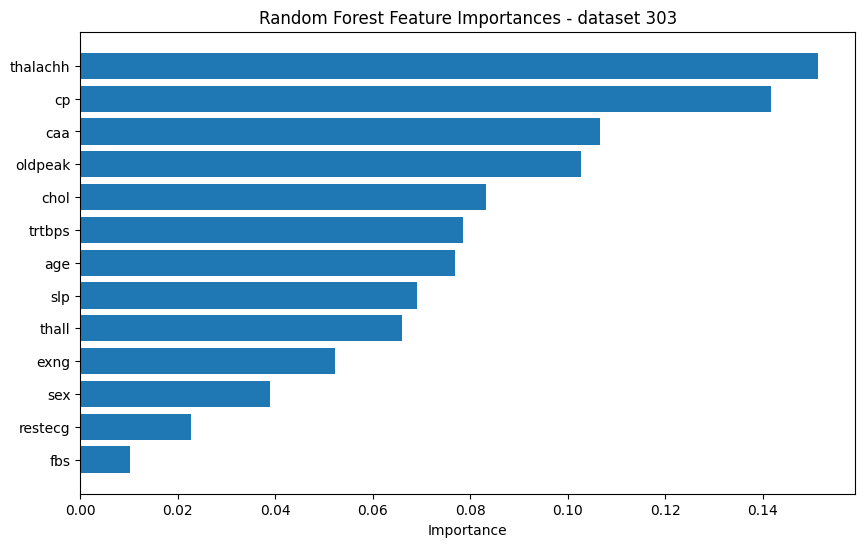

Gradient Boosting Machine Feature Importances - dataset 303
     Feature  Importance
2         cp    0.293357
11       caa    0.137506
9    oldpeak    0.086643
12     thall    0.073745
0        age    0.070326
1        sex    0.069072
7   thalachh    0.068297
10       slp    0.058108
3     trtbps    0.056880
4       chol    0.040549
8       exng    0.031684
6    restecg    0.010419
5        fbs    0.003413


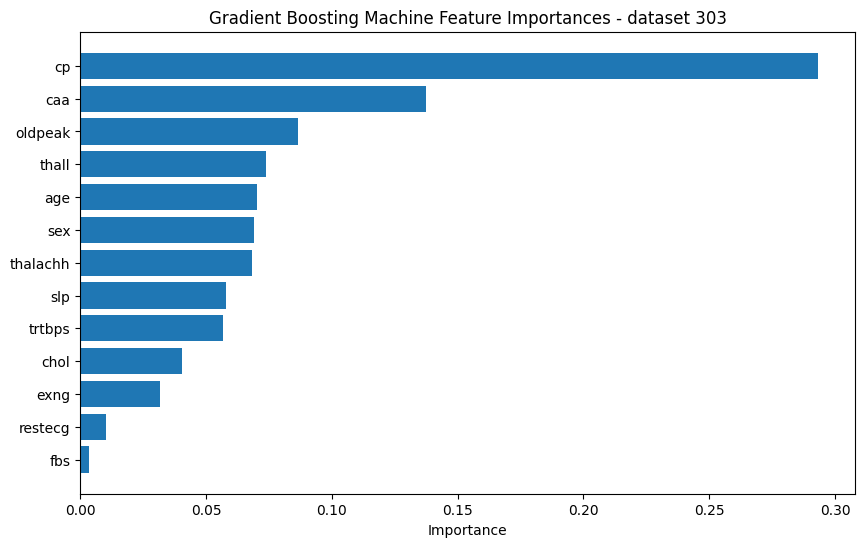

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Random Forest Feature Importances - dataset 303")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances - dataset 303')
plt.show()

# Similarly, get feature importances from the Gradient Boosting model
feature_importances_gbm = gbm.feature_importances_
importance_df_gbm = pd.DataFrame({'Feature': features, 'Importance': feature_importances_gbm})
importance_df_gbm = importance_df_gbm.sort_values(by='Importance', ascending=False)

print("Gradient Boosting Machine Feature Importances - dataset 303")
print(importance_df_gbm)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_gbm['Feature'], importance_df_gbm['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Gradient Boosting Machine Feature Importances - dataset 303')
plt.show()

### NN - Simple Neural Network

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define input_dim based on your dataset
input_dim = X_train.shape[1]

# Simple Neural Network with reduced complexity
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=50, batch_size=42, validation_split=0.2)

# Predictions
y_pred_nn = model_nn.predict(X_test).ravel()
y_pred_nn_class = (y_pred_nn > 0.5).astype(int)

# Evaluation
print("Simple Neural Network - dataset 303")
print(classification_report(y_test, y_pred_nn_class))
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
print(f'ROC AUC: {roc_auc_nn:.2f}')

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4532 - loss: 0.8952 - val_accuracy: 0.4151 - val_loss: 0.7188
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4683 - loss: 0.8554 - val_accuracy: 0.5094 - val_loss: 0.6921
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5392 - loss: 0.7602 - val_accuracy: 0.5849 - val_loss: 0.6691
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5243 - loss: 0.7846 - val_accuracy: 0.6226 - val_loss: 0.6482
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5309 - loss: 0.7712 - val_accuracy: 0.6226 - val_loss: 0.6303
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5435 - loss: 0.7173 - val_accuracy: 0.6981 - val_loss: 0.6154
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6019 - loss: 0.7219 - val_accuracy: 0.6981 - val_loss: 0.6016
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6096 - loss: 0.6985 - val_accuracy: 0.6981 - val_loss: 0.5902
Epoch 9

### CNN

In [22]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convolutional Neural Network
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=42, validation_split=0.2)

# Predictions
y_proba_cnn = cnn_model.predict(X_test_cnn).ravel()
y_pred_cnn = (y_proba_cnn > 0.5).astype(int)

# Evaluation
print("Convolutional Neural Network - dataset 303")
print(classification_report(y_test, y_pred_cnn))
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)
print(f'ROC AUC: {roc_auc_cnn:.2f}')

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5361 - loss: 0.7021 - val_accuracy: 0.6981 - val_loss: 0.6348
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7682 - loss: 0.6216 - val_accuracy: 0.7547 - val_loss: 0.5883
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7661 - loss: 0.5756 - val_accuracy: 0.7547 - val_loss: 0.5536
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7992 - loss: 0.5474 - val_accuracy: 0.7547 - val_loss: 0.5254
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7787 - loss: 0.5307 - val_accuracy: 0.7736 - val_loss: 0.4991
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7885 - loss: 0.4954 - val_accuracy: 0.7925 - val_loss: 0.4784
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7772 - loss: 0.4616 - val_accuracy: 0.7547 - val_loss: 0.4750
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7870 - loss: 0.4311 - val_accuracy: 0.7736 - val_loss: 0.4719
Epoch 9

### GRU with Attention

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, Attention
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# GRU with Attention
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], 1))
gru_layer = GRU(64, return_sequences=True)(input_layer)
attention_layer = Attention()([gru_layer, gru_layer])
flatten_layer = Flatten()(attention_layer)
output_layer = Dense(1, activation='sigmoid')(flatten_layer)

model_gru_attention = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_gru_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru_attention.fit(X_train_cnn, y_train, epochs=50, batch_size=42, validation_split=0.2)

# Predictions
y_proba_gru_attention = model_gru_attention.predict(X_test_cnn).ravel()
y_pred_gru_attention = (y_proba_gru_attention > 0.5).astype(int)

# Evaluation
print("GRU with Attention - dataset 303")
print(classification_report(y_test, y_pred_gru_attention))
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)
print(f'ROC AUC: {roc_auc_gru_attention:.2f}')

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5073 - loss: 0.6926 - val_accuracy: 0.5849 - val_loss: 0.6887
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5684 - loss: 0.6857 - val_accuracy: 0.5849 - val_loss: 0.6858
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6333 - loss: 0.6780 - val_accuracy: 0.5849 - val_loss: 0.6859
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6229 - loss: 0.6784 - val_accuracy: 0.5849 - val_loss: 0.6865
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6276 - loss: 0.6808 - val_accuracy: 0.5849 - val_loss: 0.6853
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6025 - loss: 0.6818 - val_accuracy: 0.5849 - val_loss: 0.6846
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5952 - loss: 0.6802 - val_accuracy: 0.6038 - val_loss: 0.6836
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6239 - loss: 0.6779 - val_accuracy: 0.5660 - val_loss: 0.6825


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
GRU with Attention - dataset 303
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.77      0.88      0.82        34

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66

ROC AUC: 0.84


### CNN with GRU

In [24]:
# CNN with GRU
cnn_layer = Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1))(input_layer)
pooling_layer = MaxPooling1D(pool_size=2)(cnn_layer)
gru_layer = GRU(64)(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(gru_layer)

model_cnn_gru = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_cnn_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_gru.fit(X_train_cnn, y_train, epochs=50, batch_size=42, validation_split=0.2)

# Predictions
y_proba_cnn_gru = model_cnn_gru.predict(X_test_cnn).ravel()
y_pred_cnn_gru = (y_proba_cnn_gru > 0.5).astype(int)

# Evaluation
print("CNN with GRU - dataset 303")
print(classification_report(y_test, y_pred_cnn_gru))
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)
print(f'ROC AUC: {roc_auc_cnn_gru:.2f}')

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4252 - loss: 0.6984 - val_accuracy: 0.5849 - val_loss: 0.6912
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6128 - loss: 0.6876 - val_accuracy: 0.5472 - val_loss: 0.6822
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5432 - loss: 0.6827 - val_accuracy: 0.5094 - val_loss: 0.6762
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5236 - loss: 0.6823 - val_accuracy: 0.5472 - val_loss: 0.6707
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5504 - loss: 0.6740 - val_accuracy: 0.5660 - val_loss: 0.6621
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6464 - loss: 0.6548 - val_accuracy: 0.6981 - val_loss: 0.6527
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7019 - loss: 0.6507 - val_accuracy: 0.7358 - val_loss: 0.6470
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6770 - loss: 0.6504 - val_accuracy: 0.7358 - val_loss: 0.6384
Epoc

## The Final Results - dataset 303

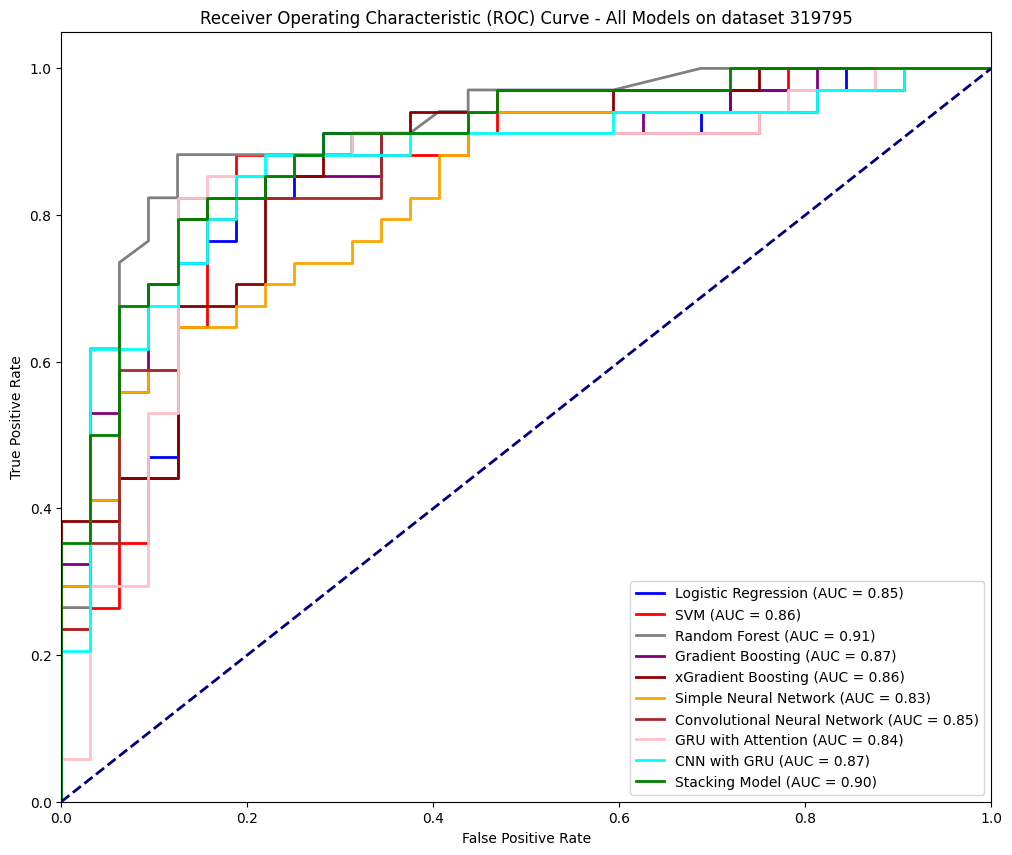

In [25]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_proba_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)

fpr_xgbm, tpr_xgbm, _ = roc_curve(y_test, y_proba_xgbm)
roc_auc_xgbm = roc_auc_score(y_test, y_proba_xgbm)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_proba_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)

fpr_gru_attention, tpr_gru_attention, _ = roc_curve(y_test, y_proba_gru_attention)
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)

fpr_cnn_gru, tpr_cnn_gru, _ = roc_curve(y_test, y_proba_cnn_gru)
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)

fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on dataset 319795')
plt.legend(loc="lower right")
plt.show()

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Gen AI Implementation - 4 steps


In [26]:
## Step1:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Load dataset - loaded

# Define features and target
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Fill missing values with mean values
#data.fillna(data.mean(), inplace=True)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [27]:
## Step 2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert your data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Create a DataLoader for batching
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()  # Tanh activation to scale the output between -1 and 1
        )

    def forward(self, x):
        return self.network(x)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        return self.network(x)

# Hyperparameters
latent_dim = 100  # Size of the latent space
input_dim = X_tensor.shape[1]  # Number of features in X
lr = 0.0002
epochs = 5000

# Initialize models
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    for batch_idx, (real_data, _) in enumerate(dataloader):
        # Train Discriminator
        optimizer_d.zero_grad()
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)  # Trick the discriminator

        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

# Generate synthetic data
z = torch.randn(1000, latent_dim)  # Generate 1000 samples
synthetic_data = generator(z).detach().numpy()

# Convert synthetic data back to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)

# Combine with the original data
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)  # Assuming the synthetic data belongs to the positive class

Epoch 0/5000, D Loss: 0.7046346664428711, G Loss: 0.6897537708282471
Epoch 1000/5000, D Loss: 2.2951473511056975e-05, G Loss: 10.683198928833008
Epoch 2000/5000, D Loss: 1.5741358083687373e-06, G Loss: 13.377898216247559
Epoch 3000/5000, D Loss: 5.28561940882355e-08, G Loss: 16.756929397583008
Epoch 4000/5000, D Loss: 5.2445008336121646e-09, G Loss: 19.06724739074707


In [28]:
## Step 3
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assume X_tensor and y_tensor have been defined from your dataset

# Hyperparameters
latent_dim = 100
input_dim = X_tensor.shape[1]
lr = 0.0002
epochs = 1000  # Start with a smaller number
patience = 10  # Early stopping patience
best_d_loss = float('inf')
best_g_loss = float('inf')
early_stopping_counter = 0

# Initialize models
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Training loop with early stopping
for epoch in range(epochs):
    for batch_idx, (real_data, _) in enumerate(dataloader):
        # Train Discriminator
        optimizer_d.zero_grad()
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)  # Trick the discriminator

        g_loss.backward()
        optimizer_g.step()

    # Early stopping based on discriminator loss
    if d_loss.item() < best_d_loss:
        best_d_loss = d_loss.item()
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    # If early stopping criteria met
    if early_stopping_counter >= patience:
        print(f"Early stopping at epoch {epoch}/{epochs}")
        break

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

# Generate synthetic data after GAN training
z = torch.randn(1000, latent_dim)  # Generate 1000 samples from the latent space
synthetic_data = generator(z).detach().numpy()

# Convert synthetic data back to a DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)

# Label the synthetic data as positive class (assuming the goal is to augment heart failure cases)
synthetic_labels = pd.Series([1] * len(synthetic_df))

# Combine synthetic data with original data
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, synthetic_labels], axis=0)

# Shuffle the combined dataset to ensure randomness
combined_X, combined_y = combined_X.sample(frac=1, random_state=42), combined_y.sample(frac=1, random_state=42)

Epoch 0/1000, D Loss: 0.6616300344467163, G Loss: 0.7274921536445618
Early stopping at epoch 84/1000


Accuracy: 0.9693486590038314
ROC AUC: 0.9924713584288052
Classification Report - Gen AI model:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.97      0.99      0.98       235

    accuracy                           0.97       261
   macro avg       0.94      0.88      0.91       261
weighted avg       0.97      0.97      0.97       261



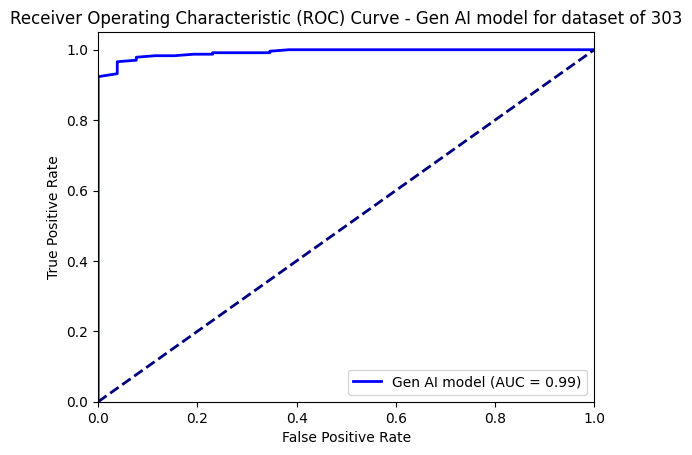

In [29]:
## Step 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Split the combined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc_genai = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Output the evaluation metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc_genai)
print("Classification Report - Gen AI model:\n", classification_rep)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gen AI model (AUC = {roc_auc_genai:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gen AI model for dataset of 303')
plt.legend(loc="lower right")
plt.show()

## The Results

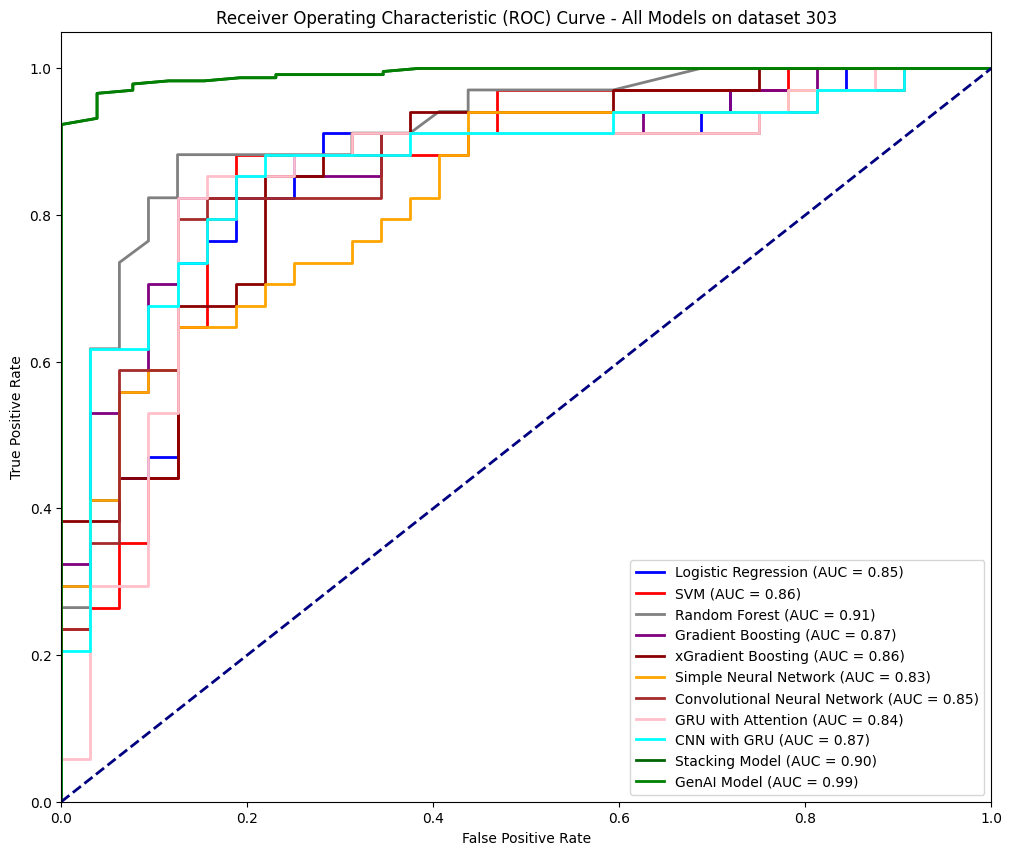

In [30]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'GenAI Model (AUC = {roc_auc_genai:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on dataset 303')
plt.legend(loc="lower right")
plt.show()

## Data Preparation and Generative AI (GAN) Model

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Load and preprocess the dataset
# data = pd.read_csv('/content/drive/MyDrive/data/framingham_11627.csv', sep=',')
# handled missing values

# Define features and target
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Generate synthetic data
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 0/5000, D Loss: 0.6032910943031311, G Loss: 0.7945245504379272
Epoch 1000/5000, D Loss: 2.0059282360151975e-11, G Loss: 24.632396697998047
Epoch 2000/5000, D Loss: 6.623346836265309e-12, G Loss: 25.740440368652344
Epoch 3000/5000, D Loss: 3.9042788099741266e-12, G Loss: 26.26896095275879
Epoch 4000/5000, D Loss: 4.845821660603988e-12, G Loss: 26.05291748046875


## Stacking GenAI with RF + GBM

Epoch 0/5000, D Loss: 1.5244832038879395, G Loss: 0.687904953956604
Epoch 1000/5000, D Loss: 0.0005924327997490764, G Loss: 7.43285608291626
Epoch 2000/5000, D Loss: 1.3036677955824416e-05, G Loss: 11.24846076965332
Epoch 3000/5000, D Loss: 4.346248090314475e-07, G Loss: 14.735435485839844
Epoch 4000/5000, D Loss: 1.7778848615535026e-08, G Loss: 17.846773147583008
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        34
           1       0.95      0.99      0.97       227

    accuracy                           0.94       261
   macro avg       0.91      0.82      0.86       261
weighted avg       0.94      0.94      0.94       261

Stacking Model ROC AUC: 0.99


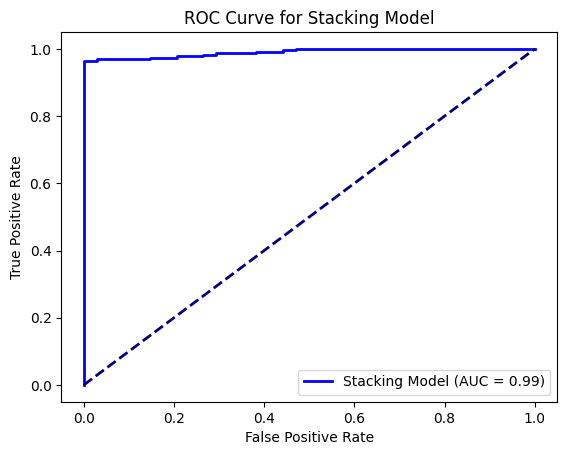

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset

# Define features and target
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() -> Add this part for CNN

# Step 7: Stacking Ensemble
# Combine predictions from different models (RF, GBM, CNN) for stacking
meta_train_rf = rf_model.predict_proba(X_train)[:, 1]
meta_train_gbm = gbm_model.predict_proba(X_train)[:, 1]
# meta_train_cnn = cnn_model.predict(X_train)[:, 1] -> Use this if CNN is added

# Use predictions as input to the meta-learner
X_meta_train = np.column_stack([meta_train_rf, meta_train_gbm])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
meta_test_rf = rf_model.predict_proba(X_test)[:, 1]
meta_test_gbm = gbm_model.predict_proba(X_test)[:, 1]
# meta_test_cnn = cnn_model.predict(X_test)[:, 1] -> Use if CNN is added

X_meta_test = np.column_stack([meta_test_rf, meta_test_gbm])

meta_predictions = meta_model.predict(X_meta_test)
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model')
plt.legend(loc='lower right')
plt.show()

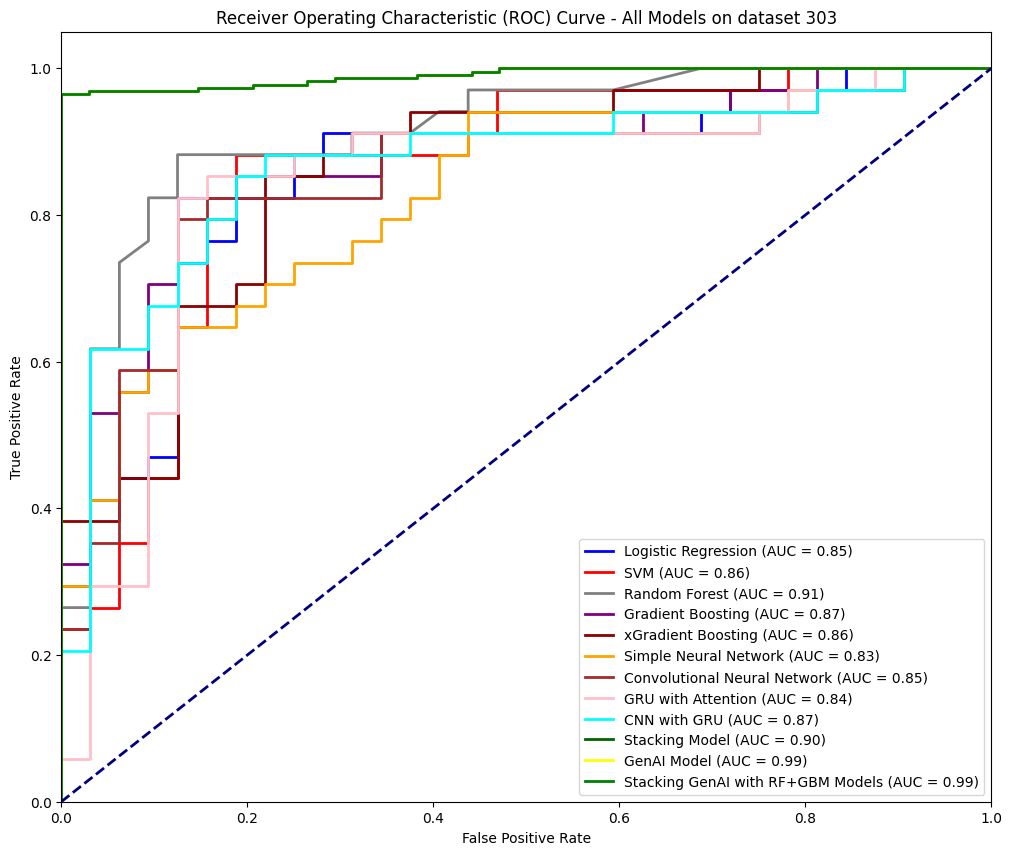

In [32]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
roc_auc = roc_auc_score(y_test, meta_proba_predictions)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')
plt.plot(fpr, tpr, color='yellow', lw=2, label=f'GenAI Model (AUC = {roc_auc_genai:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking GenAI with RF+GBM Models (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on dataset 303')
plt.legend(loc="lower right")
plt.show()

## Stacking GenAI with RF + GBM + CNN

Epoch 0/5000, D Loss: 1.5619765520095825, G Loss: 0.6938518285751343
Epoch 1000/5000, D Loss: 0.0007991798338480294, G Loss: 7.133798122406006
Epoch 2000/5000, D Loss: 1.757502104737796e-05, G Loss: 10.950178146362305
Epoch 3000/5000, D Loss: 5.144107717569568e-07, G Loss: 14.481463432312012
Epoch 4000/5000, D Loss: 1.8944838586776314e-08, G Loss: 17.782480239868164
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        34
           1       0.95      0.99      0.97       227

    accuracy                           0.94       261
   macro avg       0.91      0.82      0.86       261
weighted avg       0.94      0.94      0.94       261

Stacking Model ROC AUC: 0.99


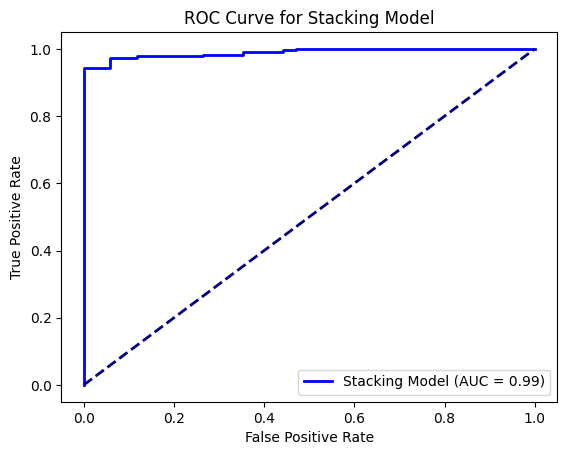

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset
# Define features and target
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=300, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Reshape X_test for CNN model (time_steps = 1)
X_test_cnn = np.expand_dims(X_test, axis=2)
X_train_cnn = np.expand_dims(X_train, axis=2)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() # for CNN

# Step 7: Stacking Ensemble
# Combine predictions from different models (RF, GBM, CNN) for stacking
meta_train_rf = rf_model.predict_proba(X_train)[:, 1]
meta_train_gbm = gbm_model.predict_proba(X_train)[:, 1]
#meta_train_cnn = cnn_model.predict(X_train_cnn)[:, 1] # for CNN
meta_train_cnn = cnn_model.predict(X_train_cnn).ravel()

# Use predictions as input to the meta-learner
X_meta_train = np.column_stack([meta_train_rf, meta_train_gbm, meta_train_cnn])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
meta_test_rf = rf_model.predict_proba(X_test)[:, 1]
meta_test_gbm = gbm_model.predict_proba(X_test)[:, 1]
#meta_test_cnn = cnn_model.predict(X_test_cnn)[:, 1] # for CNN
meta_test_cnn = cnn_model.predict(X_test_cnn).ravel()

X_meta_test = np.column_stack([meta_test_rf, meta_test_gbm, meta_test_cnn])

meta_predictions = meta_model.predict(X_meta_test)
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
# Assuming you have already the probability predictions from the stacking meta model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model')
plt.legend(loc='lower right')
plt.show()

Check Dimensions Before Stacking: Before stacking the meta-model predictions, you can check the sizes of the arrays to identify which model output is misaligned:

In [34]:
print(meta_train_rf.shape)  # Shape of Random Forest predictions
print(meta_train_gbm.shape)  # Shape of GBM predictions
print(meta_train_cnn.shape)  # Shape of CNN predictions

(1042,)
(1042,)
(1042,)


In [35]:
# Ensure that X_train, X_train_cnn, etc., have the same number of samples
print(f"RF/GBM training set shape: {X_train.shape}")
print(f"CNN training set shape: {X_train_cnn.shape}")

RF/GBM training set shape: (1042, 13)
CNN training set shape: (1042, 13, 1)


In [36]:
# Expand dimensions for CNN without losing samples
X_train_cnn = np.expand_dims(X_train, axis=2)
print(X_train_cnn.shape)  # Should now output (1042, 13, 1)

(1042, 13, 1)


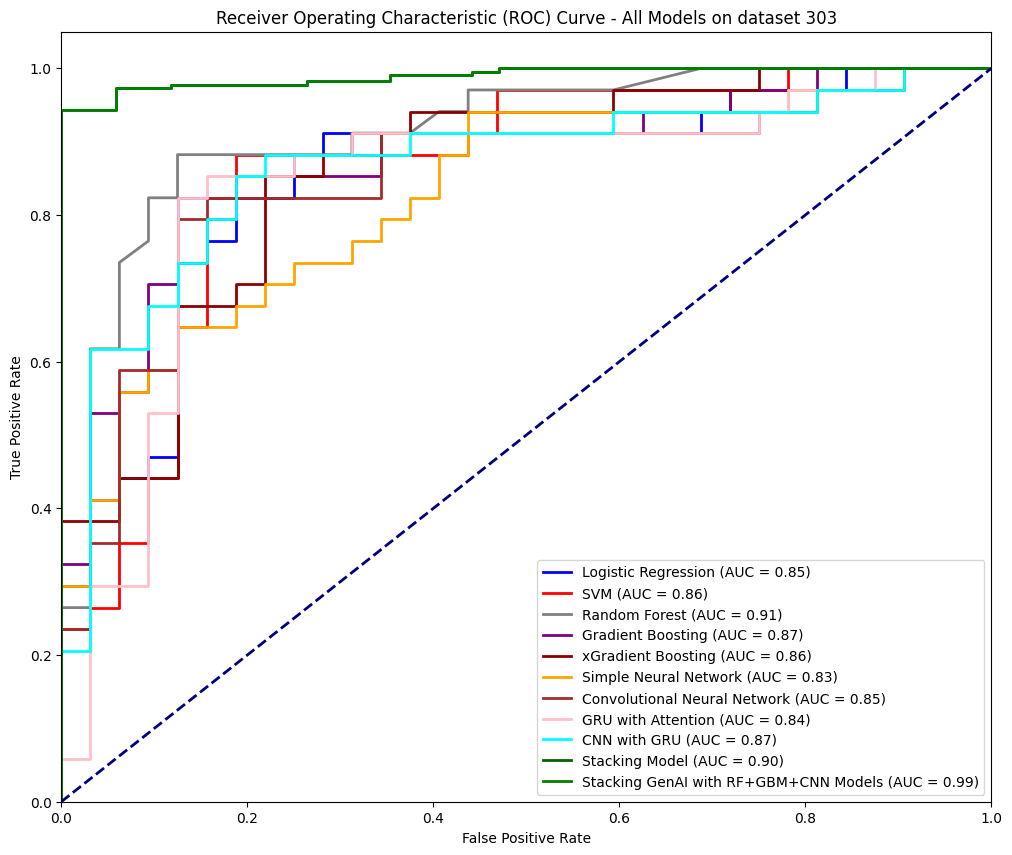

In [37]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
roc_auc = roc_auc_score(y_test, meta_proba_predictions)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking GenAI with RF+GBM+CNN Models (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on dataset 303')
plt.legend(loc="lower right")
plt.show()

## Stacking GenAI with RF + xGBM + CNN/RNN

Epoch 0/5000, D Loss: 0.6555814743041992, G Loss: 0.7368683218955994
Epoch 1000/5000, D Loss: 0.00025887455558404326, G Loss: 8.261198043823242
Epoch 2000/5000, D Loss: 6.912753633514512e-06, G Loss: 11.883647918701172
Epoch 3000/5000, D Loss: 2.0737283534799644e-07, G Loss: 15.389552116394043
Epoch 4000/5000, D Loss: 9.20273368620883e-09, G Loss: 18.50299644470215
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.88      0.62      0.72        34
           1       0.95      0.99      0.97       227

    accuracy                           0.94       261
   macro avg       0.91      0.80      0.84       261
weighted avg       0.94      0.94      0.93       261

Stacking Model ROC AUC: 0.99


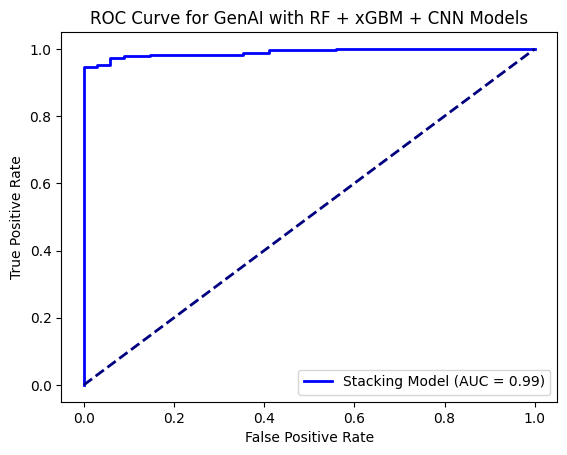

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset
# Define features and target
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
xgbm_model = GradientBoostingClassifier(n_estimators=300, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
xgbm_model.fit(X_train, y_train)

# Reshape X_test for CNN model (time_steps = 1)
X_test_cnn = np.expand_dims(X_test, axis=2)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() # for CNN

# Step 7: Stacking Ensemble
# Combine predictions from different models (RF, GBM, CNN) for stacking
meta_train_rf = rf_model.predict_proba(X_train)[:, 1]
meta_train_xgbm = xgbm_model.predict_proba(X_train)[:, 1]
meta_train_cnn = cnn_model.predict(X_train_cnn).ravel()

# Use predictions as input to the meta-learner
X_meta_train = np.column_stack([meta_train_rf, meta_train_xgbm, meta_train_cnn])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
meta_test_rf = rf_model.predict_proba(X_test)[:, 1]
meta_test_xgbm = xgbm_model.predict_proba(X_test)[:, 1]
meta_test_cnn = cnn_model.predict(X_test_cnn).ravel()

X_meta_test = np.column_stack([meta_test_rf, meta_test_xgbm, meta_test_cnn])

meta_predictions = meta_model.predict(X_meta_test)
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
# Assuming you have already the probability predictions from the stacking meta model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GenAI with RF + xGBM + CNN Models')
plt.legend(loc='lower right')
plt.show()

## Stacking GenAI with RF only - The Winner

Epoch 0/5000, D Loss: 0.71296626329422, G Loss: 0.6760272979736328
Epoch 1000/5000, D Loss: 8.192495442926884e-05, G Loss: 9.410507202148438
Epoch 2000/5000, D Loss: 2.0370359834487317e-06, G Loss: 13.1047945022583
Epoch 3000/5000, D Loss: 8.207557300465851e-08, G Loss: 16.316593170166016
Epoch 4000/5000, D Loss: 3.642987689289612e-09, G Loss: 19.431455612182617
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        34
           1       0.95      0.99      0.97       227

    accuracy                           0.95       261
   macro avg       0.93      0.82      0.86       261
weighted avg       0.95      0.95      0.94       261

Stacking Model ROC AUC: 0.99


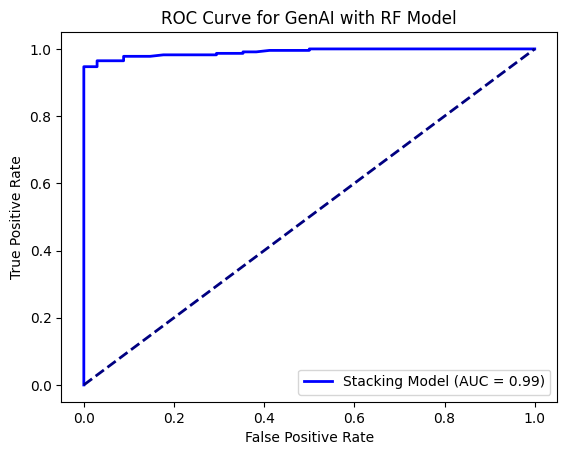

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)

# Reshape X_test for CNN model (time_steps = 1)
#X_test_cnn = np.expand_dims(X_test, axis=2)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() # for CNN

# Step 7: Stacking Ensemble
# Combine predictions from different models (RF, GBM, CNN) for stacking
meta_train_rf = rf_model.predict_proba(X_train)[:, 1]

# Use predictions as input to the meta-learner
X_meta_train = np.column_stack([meta_train_rf])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
meta_test_rf = rf_model.predict_proba(X_test)[:, 1]

X_meta_test = np.column_stack([meta_test_rf])

meta_predictions = meta_model.predict(X_meta_test)
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
# Assuming you have already the probability predictions from the stacking meta model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GenAI with RF Model')
plt.legend(loc='lower right')
plt.show()

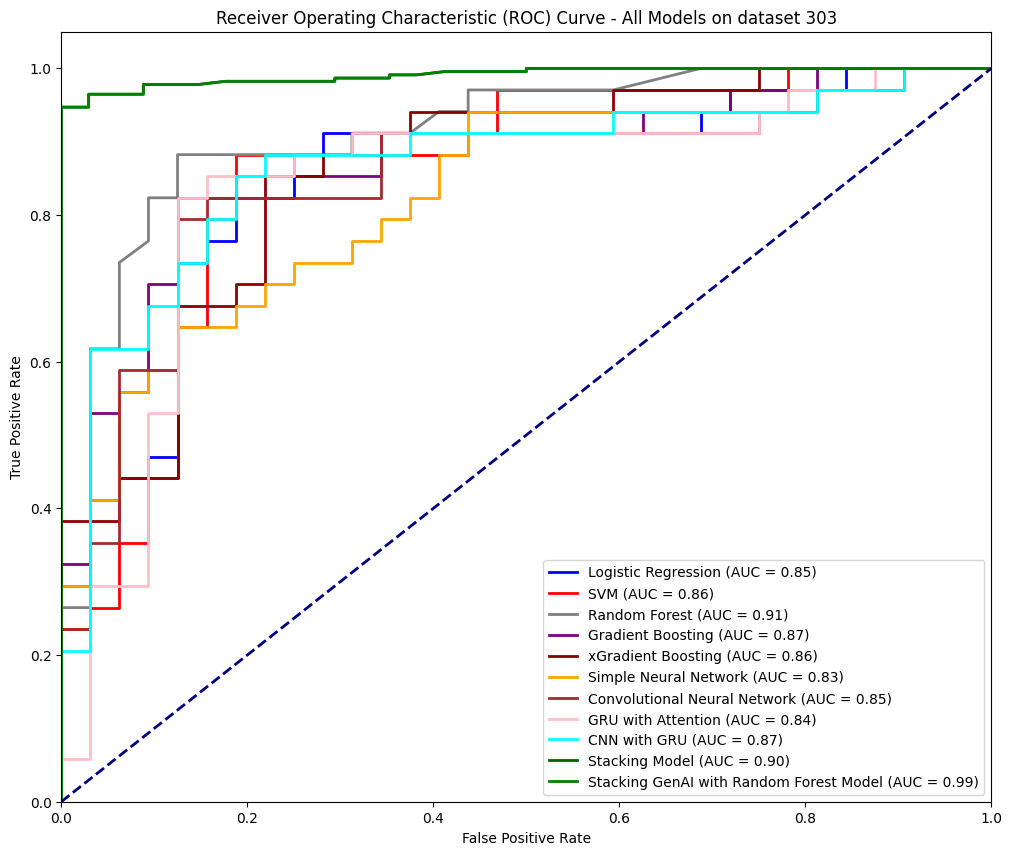

In [40]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
roc_auc = roc_auc_score(y_test, meta_proba_predictions)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking GenAI with Random Forest Model (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on dataset 303')
plt.legend(loc="lower right")
plt.show()

## Stacking GenAI with xGBM

Epoch 0/5000, D Loss: 4.742315292358398, G Loss: 0.690351128578186
Epoch 1000/5000, D Loss: 0.0006626819376833737, G Loss: 7.321821689605713
Epoch 2000/5000, D Loss: 1.8721486412687227e-05, G Loss: 10.887399673461914
Epoch 3000/5000, D Loss: 5.166504593034915e-07, G Loss: 14.476862907409668
Epoch 4000/5000, D Loss: 1.5626664406909185e-08, G Loss: 17.975664138793945
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.88      0.62      0.72        34
           1       0.95      0.99      0.97       227

    accuracy                           0.94       261
   macro avg       0.91      0.80      0.84       261
weighted avg       0.94      0.94      0.93       261

Stacking Model ROC AUC: 0.99


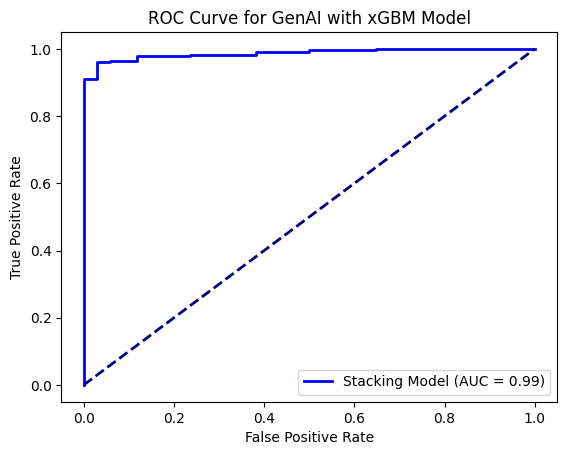

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
xgbm_model = GradientBoostingClassifier(n_estimators=300, random_state=42)

# Train the models
xgbm_model.fit(X_train, y_train)

# Reshape X_test for CNN model (time_steps = 1)
#X_test_cnn = np.expand_dims(X_test, axis=2)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() # for CNN

# Step 7: Stacking Ensemble
# Combine predictions from different models (RF, GBM, CNN) for stacking
meta_train_xgbm = xgbm_model.predict_proba(X_train)[:, 1]

# Use predictions as input to the meta-learner
X_meta_train = np.column_stack([meta_train_xgbm])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
meta_test_xgbm = xgbm_model.predict_proba(X_test)[:, 1]

X_meta_test = np.column_stack([meta_test_xgbm])

meta_predictions = meta_model.predict(X_meta_test)
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
# Assuming you have already the probability predictions from the stacking meta model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GenAI with xGBM Model')
plt.legend(loc='lower right')
plt.show()

## Stacking GenAI with RF + CNN

Epoch 0/5000, D Loss: 2.1992130279541016, G Loss: 0.64930260181427
Epoch 1000/5000, D Loss: 0.000839018844999373, G Loss: 7.085349082946777
Epoch 2000/5000, D Loss: 1.8144372006645426e-05, G Loss: 10.918753623962402
Epoch 3000/5000, D Loss: 5.605664910035557e-07, G Loss: 14.395014762878418
Epoch 4000/5000, D Loss: 1.8054508998943675e-08, G Loss: 17.82984733581543
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75        34
           1       0.95      1.00      0.97       227

    accuracy                           0.95       261
   macro avg       0.95      0.81      0.86       261
weighted avg       0.95      0.95      0.94       261

Stacking Model ROC AUC for GenAI Model with CNN: 0.99


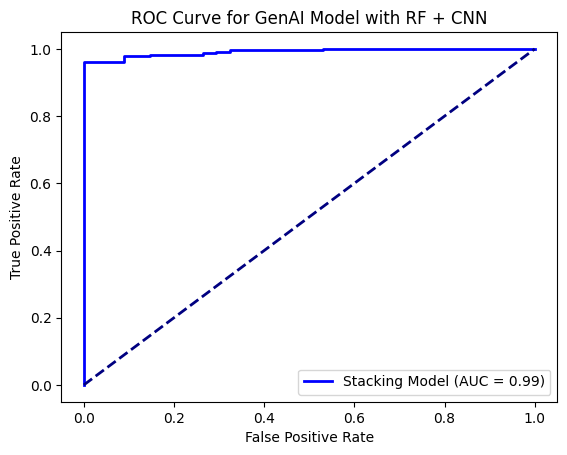

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the dataset
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1)

# Define DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define the Generator and Discriminator Networks for GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.network(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training the GAN Model
latent_dim = 100
input_dim = X_tensor.shape[1]
generator = Generator(latent_dim, input_dim)
discriminator = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.00005)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.00005)

epochs = 5000
for epoch in range(epochs):
    for real_data, _ in dataloader:
        # Train Discriminator
        z = torch.randn(real_data.size(0), latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(real_data.size(0), 1)
        fake_labels = torch.zeros(real_data.size(0), 1)

        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        fake_data = generator(z)
        g_loss = criterion(discriminator(fake_data), real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Step 4: Generate synthetic data using the trained GAN model
z = torch.randn(1000, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Combine synthetic and original data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_X = pd.concat([X, synthetic_df], axis=0)
combined_y = pd.concat([y, pd.Series([1] * len(synthetic_df))], axis=0)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, combined_y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train models (Random Forest, GBM, CNN/RNN, etc.)

# Random Forest and GBM models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
#xgbm_model = GradientBoostingClassifier(n_estimators=300, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
#xgbm_model.fit(X_train, y_train)

# Reshape X_test for CNN model (time_steps = 1)
X_test_cnn = np.expand_dims(X_test, axis=2)

# CNN model setup
# (Assuming CNN is already trained similarly to RF/GBM)
# cnn_model = create_and_train_cnn_model() # for CNN

# Step 7: Stacking Ensemble
# Combine predictions from different models (RF, GBM, CNN) for stacking
meta_train_rf = rf_model.predict_proba(X_train)[:, 1]
#meta_train_xgbm = xgbm_model.predict_proba(X_train)[:, 1]
meta_train_cnn = cnn_model.predict(X_train_cnn).ravel()

# Use predictions as input to the meta-learner
X_meta_train = np.column_stack([meta_train_rf, meta_train_cnn])

# Train meta-learner (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Step 8: Evaluate the stacked model
meta_test_rf = rf_model.predict_proba(X_test)[:, 1]
#meta_test_xgbm = xgbm_model.predict_proba(X_test)[:, 1]
meta_test_cnn = cnn_model.predict(X_test_cnn).ravel()

X_meta_test = np.column_stack([meta_test_rf, meta_test_cnn])

meta_predictions = meta_model.predict(X_meta_test)
print(f"Classification Report for Stacking Model:\n{classification_report(y_test, meta_predictions)}")

# Compute ROC AUC for the Stacking Model
# Assuming you have already the probability predictions from the stacking meta model
meta_proba_predictions = meta_model.predict_proba(X_meta_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, meta_proba_predictions)
print(f"Stacking Model ROC AUC for GenAI Model with CNN: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GenAI Model with RF + CNN')
plt.legend(loc='lower right')
plt.show()

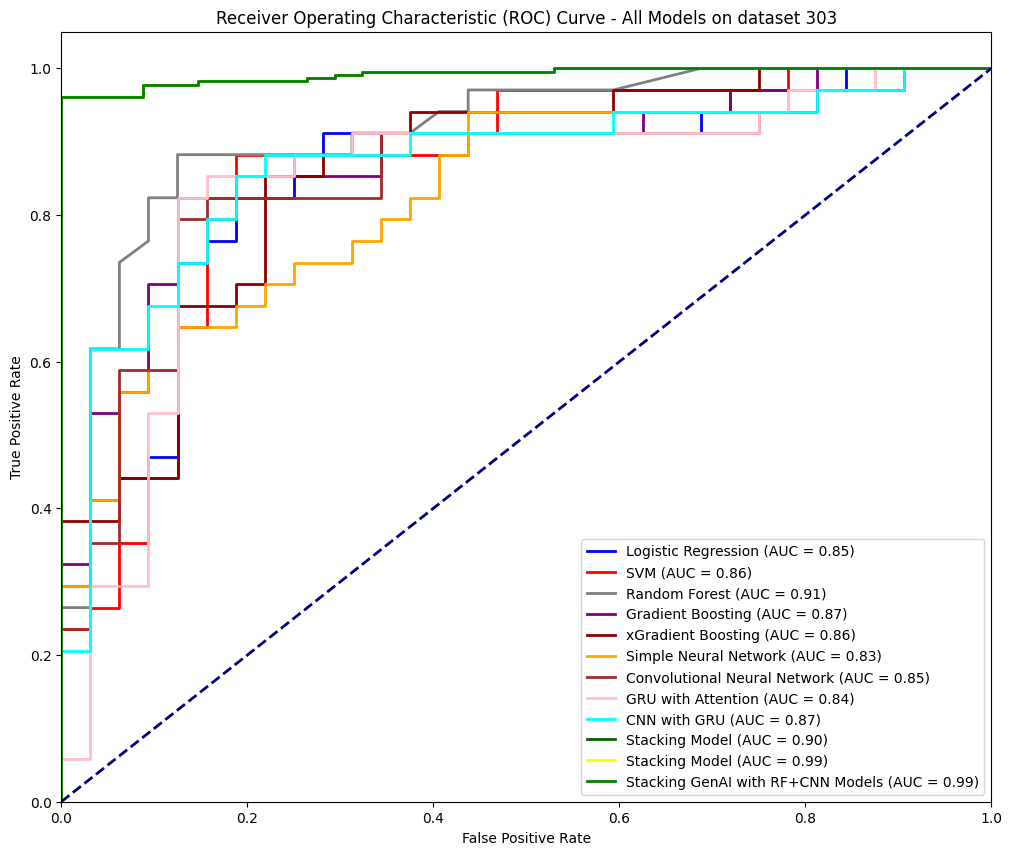

In [44]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, meta_proba_predictions)
roc_auc = roc_auc_score(y_test, meta_proba_predictions)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')
plt.plot(fpr, tpr, color='yellow', lw=2, label=f'Stacking Model (AUC = {roc_auc_genai:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking GenAI with RF+CNN Models (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on dataset 303')
plt.legend(loc="lower right")
plt.show()